## Test sandbox for stardist 2D and 3D augmenters

This notebook is setup to run tests of stardist 2D and 3D augmentation on the skimage cells3d test image. 

In [28]:
from tnia.plotting.projections import show_xy_zy_slice_center
from tnia.plotting.plt_helper import imshow2d, imshow_multi2d
from tnia.deeplearning.augmentation import stardist_3d_augmenter, stardist_2d_augmenter
import numpy as np
from skimage.filters import threshold_otsu

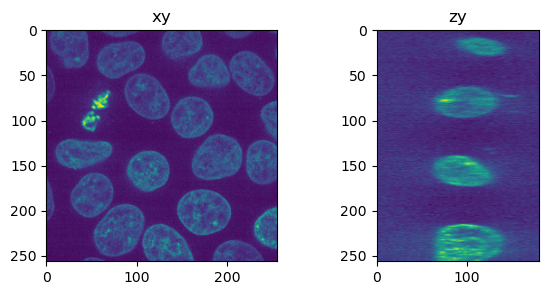

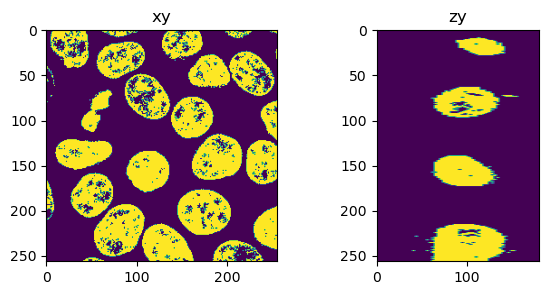

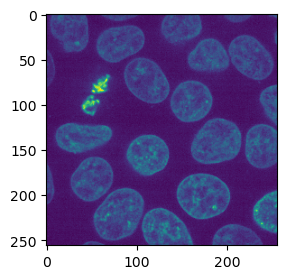

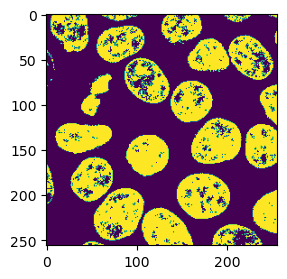

In [20]:
### Use skimage cells data

from skimage.data import cells3d

imND = cells3d()
im3D = imND[:,1,...]  # pick channel, make sure ZYX dim order
label3D = np.zeros(im3D.shape, dtype=np.uint8)
label3D[im3D>threshold_otsu(im3D)]=1

im2D = im3D[im3D.shape[0]//2,...]  
label2D = label3D[label3D.shape[0]//2,...]

fig = show_xy_zy_slice_center(im3D,1,3, figsize=(7,3))
fig = show_xy_zy_slice_center(label3D,1,3, figsize=(7,3))
fig = imshow2d(im2D,3,3)
fig = imshow2d(label2D,3,3)

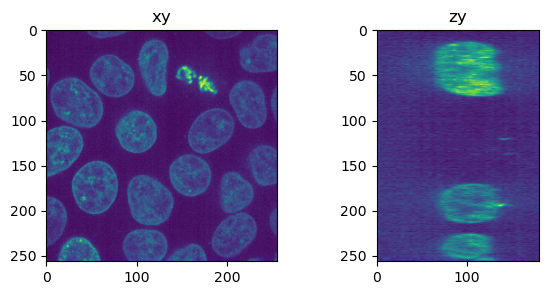

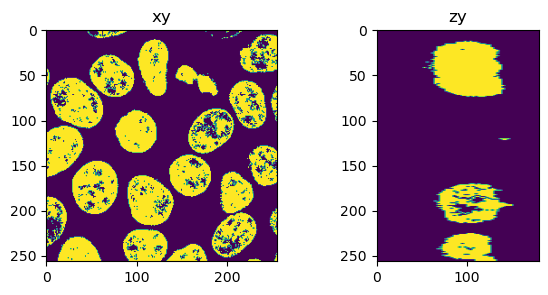

In [25]:
im3D_a, label3D_a = stardist_3d_augmenter(im3D, label3D)
fig = show_xy_zy_slice_center(im3D_a,1,3, figsize=(7,3))
fig = show_xy_zy_slice_center(label3D_a,1,3, figsize=(7,3))

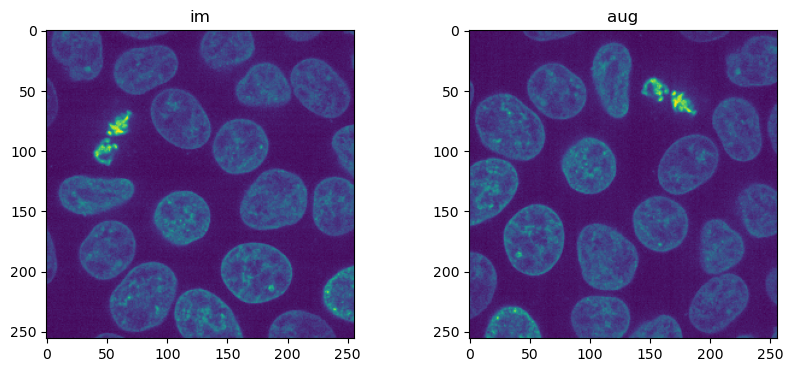

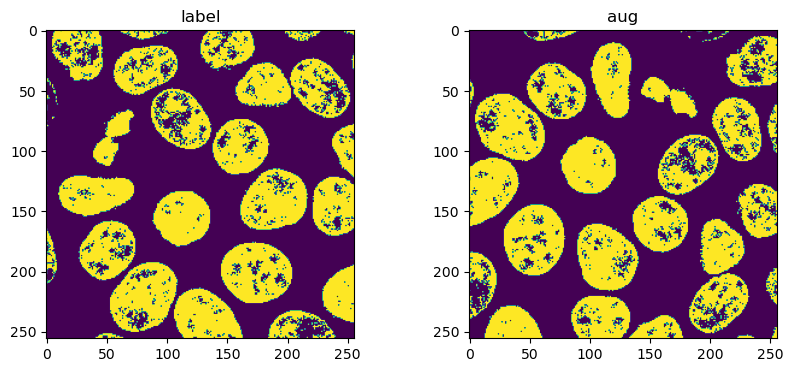

In [30]:
im2D_a, label2D_a = stardist_2d_augmenter(im2D, label2D)

fig = imshow_multi2d([im2D,im2D_a], ['im','aug'],1,2)
fig = imshow_multi2d([label2D,label2D_a], ['label','aug'],1,2)